In [146]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [86]:
def symbol_to_path(symbol):
    """Return CSV file path given ticker symbol"""
    return os.path.join("{}.csv".format(str(symbol)))

In [134]:
#normalize_data  stock
"""def get_data(symbols,dates):
    """Read stock data(adjusted close) for given symbols from CSV files."""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols: #To add SPY for refernece,if absent
        symbols.insert(0,'SPY')
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col='Date',
                           parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan']) 
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        if symbol =='SPY': #drop dates SPY  did not trade
            df=df.dropna(subset=["SPY"])
        df=df/df.ix[0,:]
    return df """
   
   

SyntaxError: invalid syntax (<ipython-input-134-9ade0299e4fd>, line 3)

In [135]:
#Normal stock output
def get_data(symbols,dates):
    """Read stock data(adjusted close) for given symbols from CSV files."""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols: #To add SPY for refernece,if absent
        symbols.insert(0,'SPY')
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col='Date',
                           parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan']) 
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        if symbol =='SPY': #drop dates SPY  did not trade
            df=df.dropna(subset=["SPY"])
    return df

In [136]:
# make plot frame
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

In [154]:
#make plot frame time range
def plot_selected(df,columns,start_index,end_index):
    plot_data(df.ix[start_index:end_index,columns],title="Selected data")

In [155]:
"""def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


SyntaxError: invalid syntax (<ipython-input-155-6d545affbcff>, line 2)

In [156]:
"""def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values,window=window)


SyntaxError: invalid syntax (<ipython-input-156-eccb68d47825>, line 2)

In [157]:
"""def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band=rm+rstd *2
    lower_band=rm-rstd*2
    return upper_band, lower_band

SyntaxError: invalid syntax (<ipython-input-157-8252da62a631>, line 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


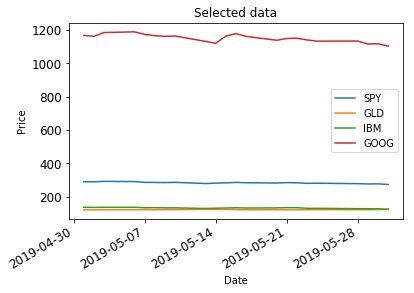

SPY      282.616250
GLD      121.211819
IBM      131.243900
GOOG    1150.763178
dtype: float64


AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [153]:
def test_run():
    #Define a date range
    dates=pd.date_range('2019-05-01','2019-05-31')
    
    symbols=['SPY','GLD','IBM','GOOG']
    
    #Get stock data
    df=get_data(symbols, dates)
    
    plot_selected(df,['SPY','GLD','IBM','GOOG'],'2019-01-01','2019-11-30')
    
    print(df.mean()) 
    
     # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
    #Slice by row(dates) using DataFrame.ix[] selector
    #print df.ix['2019-05-01':'2019-05-15'] 
    
    #Slice by column (symbols)
    #print df['GOOG'] # a single label selects a signle column
    #print df['IBM','GLD'] # a list of labels 
print(test_run())